# Classification Example <br>
Jupyter notebook for the course of Bayesian Machine Learning, section: Introduction to Neural Networks. Universidad Tecnológica de Pereira.

## Advanced topics on machine learning <br>

Mauricio A. Álvarez, PhD <br>
Cristian Guarnizo PhD, y Hernán F. García PhD (c) - TA

In this example we use TensorFlow 2.0 (TF2). If you already have this version of TF2 installed in your machine, you can skip this step. However, if your are running this code in a Google Colab session, the you need to excute this next line.

In [3]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 382kB/s 
     |████████████████████████████████| 61kB 20.5MB/s 
     |████████████████████████████████| 419kB 43.4MB/s 
     |████████████████████████████████| 3.0MB 33.3MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


Typically, we start by importing all the libraries that we require for this example

In [4]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-alpha0


## Iris Dataset

Next, we download the Iris dataset from the UCI webpage by executing the following line.

In [5]:
dataset_path = keras.utils.get_file("iris.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
dataset_path

8192/4551 [======================================================] - 0s 0us/step


'/root/.keras/datasets/iris.data'

We load the dataset into the "dataset" variable and print its first 5 rows.

In [6]:
column_names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", header=0)

dataset = raw_dataset.copy()
dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Now we plot the relation of the three species using a scatter plot.

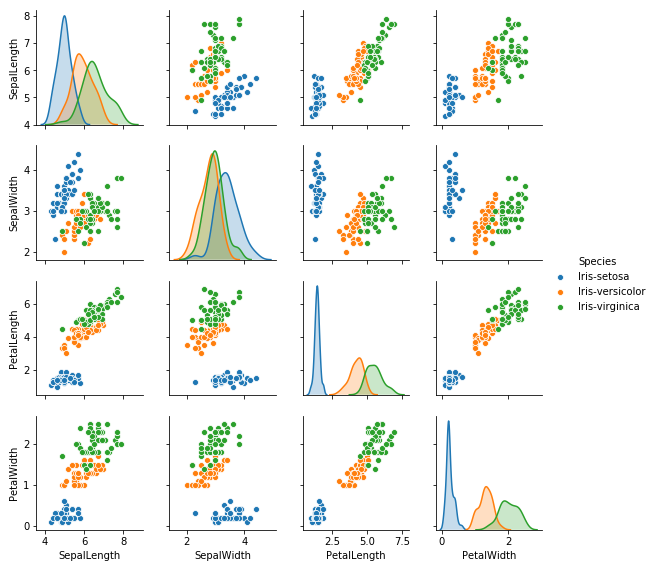

In [7]:
sns.pairplot(dataset, hue="Species", height=2, diag_kind="kde")
plt.show()

We define what columns are the features and which corresponds to the labels.

In [8]:
cols = dataset.columns
features = cols[0:4]
labels = cols[4]
print(features)
print(labels)

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')
Species


We proceed to normalide the features

In [0]:
data_norm = pd.DataFrame(dataset)

for feature in features:
    data_norm[feature] = (dataset[feature] - dataset[feature].mean())/dataset[feature].std()

We split the normalized data into train and test sets

In [0]:
train_dataset = data_norm.sample(frac=0.7,random_state=0)
test_dataset = data_norm.drop(train_dataset.index)
train_labels = train_dataset.pop('Species')
test_labels = test_dataset.pop('Species')

Our labels are in string form, we need to convert them into one-hot representation.

In [0]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return keras.utils.to_categorical(ids, len(uniques))

train_labels = one_hot_encode_object_array(train_labels)
test_labels = one_hot_encode_object_array(test_labels)

## Question <br>

How many samples are used for training and test tasks? For each feature or class?

## The Neural Network Model

We build the NN model using the sequential constructor command from TensorFlow.

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation=tf.nn.sigmoid, input_shape=(train_dataset.shape[1],)),
    layers.Dense(train_labels.shape[1], activation=tf.nn.softmax)
  ])

  model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=["accuracy"])
  return model

model = build_model()

We train the model and test its performance against the test data.

In [13]:
model.fit(train_dataset, train_labels, epochs=100, batch_size=1, verbose=0)
loss, accuracy = model.evaluate(test_dataset, test_labels, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.96


# Excercises <br>
1. Plot the history of the model during its training (you can use the code from the Regression example).
2. Use the early stopping criterion for this model.
3. Try using a different neural network and compare its performance with the results obatined above: <br>
    a) Using different activation functions (relu, sigmoid). <br>
    b) Using a different number of layers. <br> <br>